In this book, we try to establish some first order and second order statistics from the households, in order to figure out things about their distirbution

In [1]:
# Load in packages and data
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

from typing import Tuple, List, Dict, Optional

from pathlib import Path

cwd = Path.cwd()

ll_df_cph = pd.read_csv(cwd / 'll_data' / 'll_cph.csv')
ll_df_aarhus = pd.read_csv(cwd / 'll_data' / 'll_aarhus.csv')
ll_df_odense = pd.read_csv(cwd / 'll_data' / 'll_odense.csv')

df_list = [ll_df_cph, ll_df_aarhus, ll_df_odense]
county_names = ['københavn', 'århus', 'odense']

/var/folders/xr/n973hf0s243g7hdvvvh5kzmr0000gn/T/ipykernel_92506/3333189222.py:15: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  ll_df_cph = pd.read_csv(cwd / 'll_data' / 'll_cph.csv')



Number of households per county and year:
county      københavn  odense  århus
event_year                          
1787            22938   10873   5333
1801            25905   12634   5731
1834            10896   15892   7012
1840            30380   16704   5673
1845            27864   17216   7885
1850            35274   17639   7792
1860            44143   22670  10022
1880            67788   24421  10907
1901           133697   34674  22007


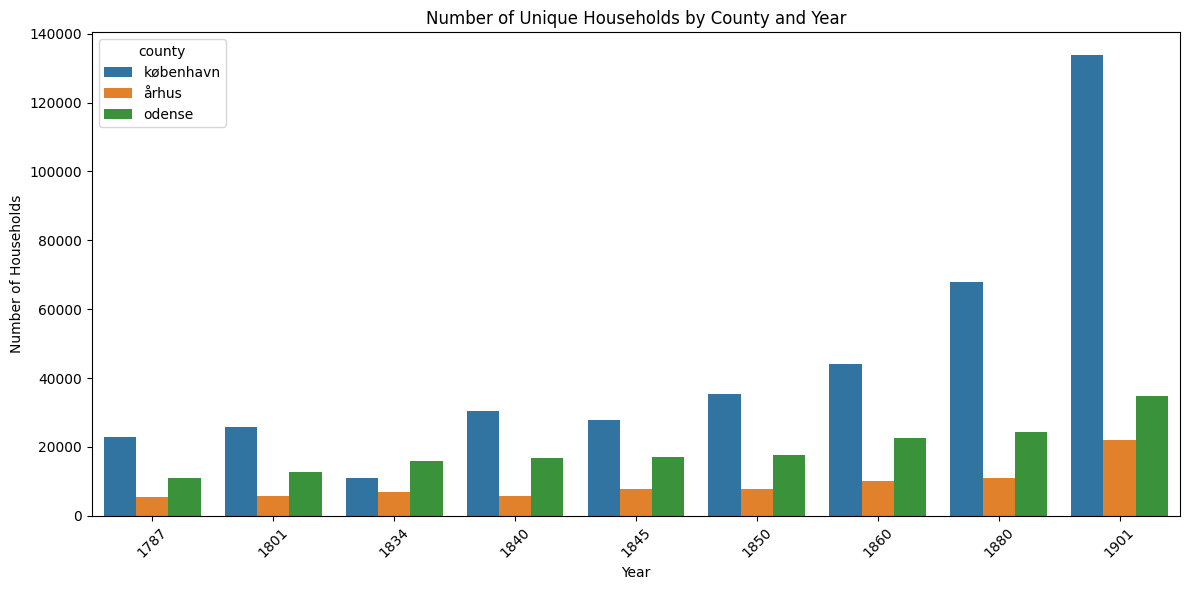

In [2]:
def analyze_household_distribution(df_list: List[pd.DataFrame], 
                                 county_names: List[str]) -> pd.DataFrame:
    """
    Analyzes the distribution of unique households across counties and years.
    
    Args:
        df_list: List of DataFrames containing census data
        county_names: List of county names corresponding to the DataFrames
        
    Returns:
        DataFrame with household counts by county and year
    """
    household_counts = []
    
    for df, county in zip(df_list, county_names):
        yearly_counts = (df.groupby('event_year')['household_id']
                        .nunique()
                        .reset_index()
                        .assign(county=county))
        household_counts.append(yearly_counts)
    
    return pd.concat(household_counts)

# Analyze the data
household_dist = analyze_household_distribution(df_list, county_names)

# Create visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=household_dist, x='event_year', y='household_id', hue='county')
plt.title('Number of Unique Households by County and Year')
plt.xlabel('Year')
plt.ylabel('Number of Households')
plt.xticks(rotation=45)
plt.tight_layout()

# Display numeric results
pivot_table = household_dist.pivot(index='event_year', 
                                 columns='county', 
                                 values='household_id')
print("\nNumber of households per county and year:")
print(pivot_table)